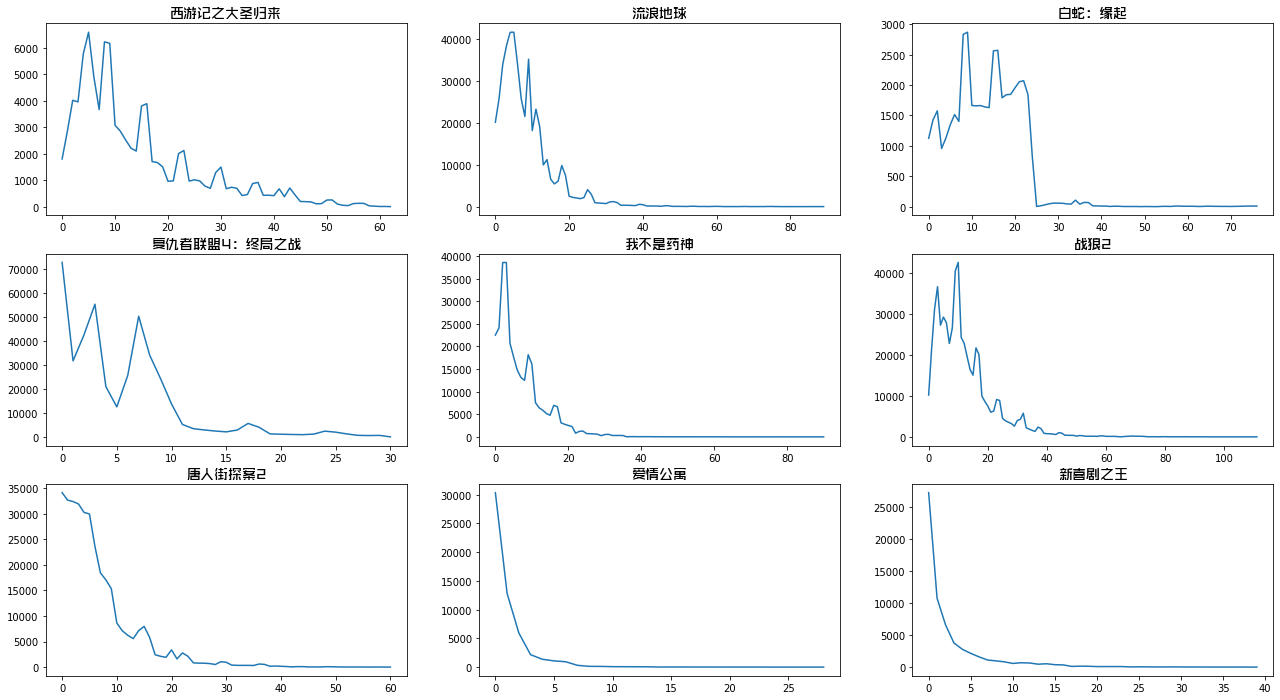

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from pylab import mpl

# 中文字体设置
font = mpl.font_manager.FontProperties(fname='../zhaozi.ttf', size=14)

# 数据读取
data = pd.read_csv('boxoffice.csv', sep=',', encoding='utf8') # 读取数据
title = data.columns.tolist()

# 设定图表属性
plt.figure(figsize=(22, 12))
plt.xticks() # 横坐标
plt.xlabel("", fontsize=14) #X轴标签
plt.ylabel("票房（单位/万）", fontproperties=font)  #Y轴标签
# def runplt():
    
for i in range(9):
    plt.subplot(3, 3, i+1)
    y = data[title[i]].dropna().tolist()
    x = [i for i in range(len(y))]
    plt.title(title[i], fontproperties=font) #图标题
    plt.plot(x, y)   #绘图

#plt.savefig(r'boxoffice.png', dpi=300) #指定分辨率保存  
plt.show()

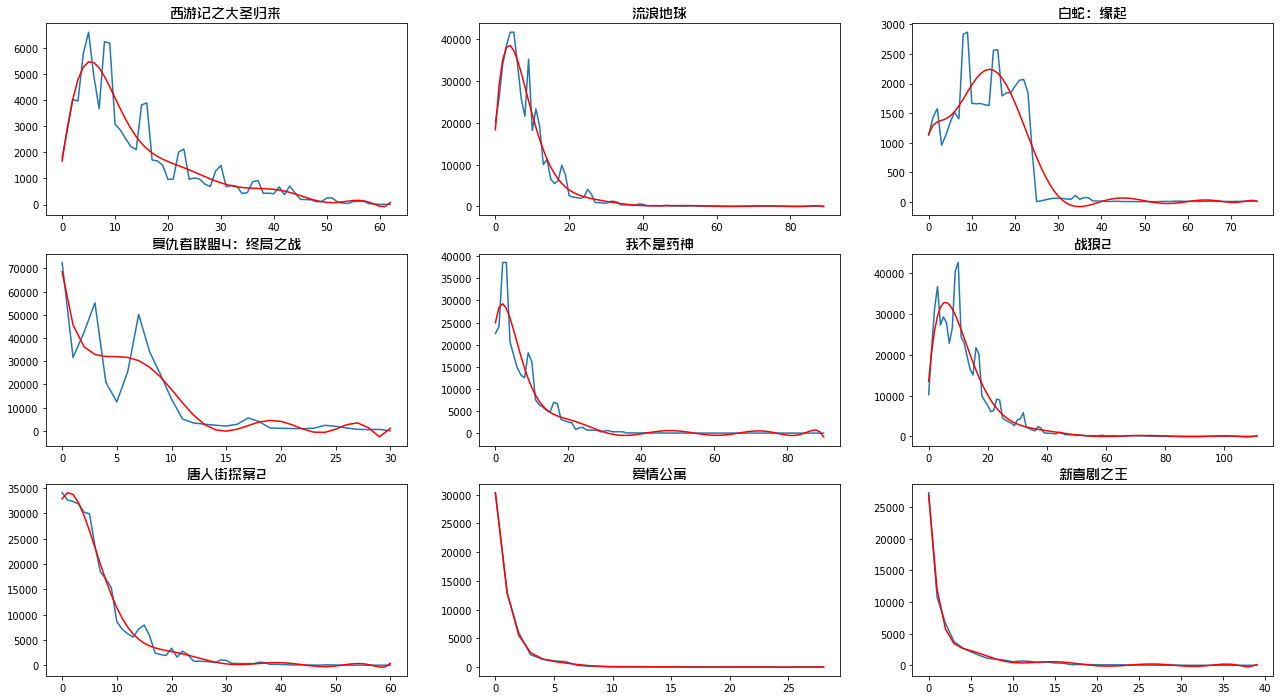

In [116]:
import numpy as np

#多项式拟合
def draw_fit(data):
    x = np.array(range(len(data)))
    z = np.poly1d(np.polyfit(x, data, 10))
    plt.plot(x, z(x), 'r-')
    return z

plt.figure(figsize=(22, 12))

func_fits = []
for i in range(9):
    plt.subplot(3, 3, i+1)
    y = data[title[i]].dropna().tolist()
    x = [i for i in range(len(y))]
    plt.title(title[i], fontproperties=font) #图标题
    plt.plot(x, y)   #绘图
    z = draw_fit(y)  #绘制拟合曲线
    func_fits.append(z)

plt.show()

拟合参数 [0.5931439 1.       ]


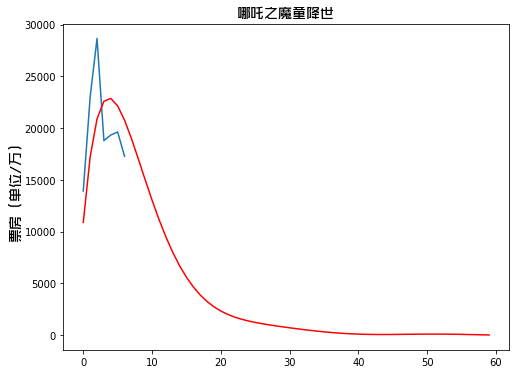

总票房预估：275949 万


In [119]:
from scipy.optimize import leastsq

z = func_fits[1]
def func(x, p):
    A, k = p
#     return A * z(k * x)
    return A * z(x)

def residuals(p, y, x):
    #实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
    return y - func(x, p)

# 数据读取
data_nz = pd.read_csv('nezha.csv', sep=',', encoding='utf8') # 读取数据
title = data_nz.columns.tolist()
y2 = data_nz[title[0]].dropna().tolist()
x2 = np.array(range(len(y2)))

p0 = [1, 1] # 第一次猜测的函数拟合参数
plsq = leastsq(residuals, p0, args=(y2, x2))

print("拟合参数", plsq[0]) # 实验数据拟合后的参数

x3 = np.array(range(60))

plt.figure(figsize=(8, 6))
plt.xticks() # 横坐标
plt.xlabel("", fontsize=14) #X轴标签
plt.ylabel("票房（单位/万）", fontproperties=font)  #Y轴标签

plt.title(title[0], fontproperties=font) #图标题

plt.plot(x2, y2)
y3 = func(x3, plsq[0])
plt.plot(x3, y3, 'r-')
plt.show()

print('总票房预估：%.f 万' % np.sum(y3))